In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tintanic-data-classification/Titanic-Dataset (1).csv


In [2]:
titanic_clf = pd.read_csv("/kaggle/input/tintanic-data-classification/Titanic-Dataset (1).csv")


In [3]:
print(titanic_clf.shape)

(891, 12)


In [4]:
print(titanic_clf.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
print(titanic_clf.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [6]:
#No of Missing Values:
missing_values =titanic_clf.isnull().sum()
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
#Fill Missing values:
titanic_clf['Age'].fillna(titanic_clf['Age'].median(), inplace=True)


/tmp/ipykernel_16/925504107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clf['Age'].fillna(titanic_clf['Age'].median(), inplace=True)


In [8]:
titanic_clf['Fare'].fillna(titanic_clf['Fare'].median(), inplace=True)

/tmp/ipykernel_16/824171312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clf['Fare'].fillna(titanic_clf['Fare'].median(), inplace=True)


In [9]:
titanic_clf['Embarked'].fillna( titanic_clf['Embarked'].mode()[0], inplace=True)


/tmp/ipykernel_16/1193046750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clf['Embarked'].fillna( titanic_clf['Embarked'].mode()[0], inplace=True)


In [10]:
# Again Checking whether missing values filled or not , by this out we get to know that the 
#missing values of Fare, Age and Embark has be handled.

missing_values =titanic_clf.isnull().sum()
print(missing_values[missing_values > 0])

Cabin    687
dtype: int64


In [11]:
print(titanic_clf.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
# Map 'male' to 0 and 'female' to 1
titanic_clf['Sex'] = titanic_clf['Sex'].map({'male': 0, 'female': 1})


In [13]:
#  Q = 0, S = 1, C = 2
titanic_clf['Embarked'] = titanic_clf['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})

In [14]:
# Feature selection
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X = titanic_clf[features]
y = titanic_clf['Survived']

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
Confusion Matrix:
[[89 16]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [19]:
# Feature Importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
    Feature  Importance
4      Fare    0.277746
5       Sex    0.266668
1       Age    0.250299
0    Pclass    0.082738
2     SibSp    0.049070
3     Parch    0.038675
6  Embarked    0.034803


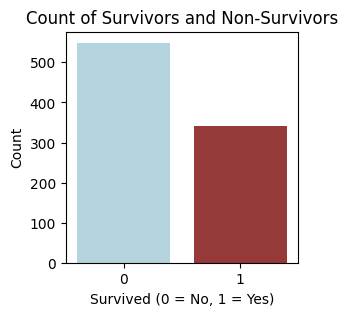

In [20]:
# Bar Plot: Visualize survival counts
plt.figure(figsize=(3, 3))
sns.countplot(data=titanic_clf, x='Survived', palette=['lightblue', 'Brown'])
plt.title('Count of Survivors and Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

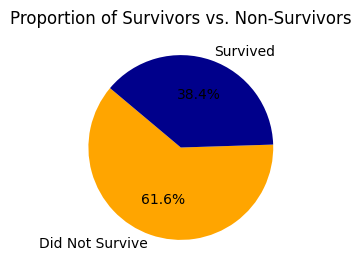

In [21]:
# Pie Chart: Show proportions of survivors vs. non-survivors
survival_counts = titanic_clf['Survived'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['orange','darkblue'])
plt.title('Proportion of Survivors vs. Non-Survivors')
plt.show()

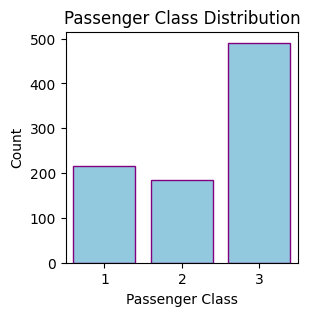

In [22]:
# Bar Plot to show Pclass distribution
plt.figure(figsize=(3,3))
sns.countplot(data=titanic_clf, x='Pclass', color='skyblue', edgecolor='purple')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

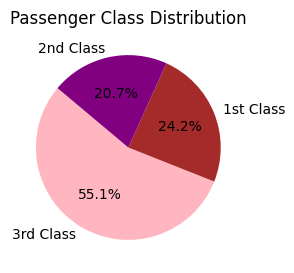

In [23]:
# Pie Chart for Pclass Distribution
pclass_counts = titanic_clf['Pclass'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(pclass_counts, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', startangle=140, 
        colors=['lightpink', 'brown', 'purple'])
plt.title('Passenger Class Distribution')
plt.show()

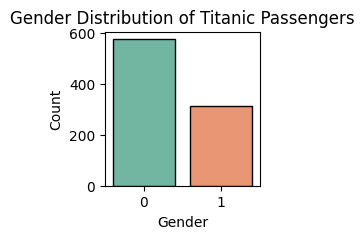

In [24]:
# Bar Plot for Gender Distribution
plt.figure(figsize=(2, 2))
sns.countplot(data=titanic_clf, x='Sex',palette='Set2', edgecolor='black')
plt.title('Gender Distribution of Titanic Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

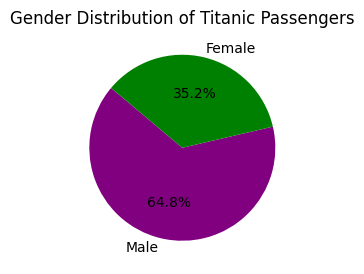

In [25]:
# Pie Chart for Gender Distribution
gender_counts = titanic_clf['Sex'].value_counts()
plt.figure(figsize=(3, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['purple', 'green'])
plt.title('Gender Distribution of Titanic Passengers')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


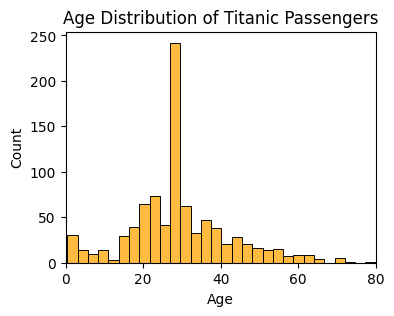

In [26]:
# Histogram for Age Distribution
plt.figure(figsize=(4, 3))
sns.histplot(titanic_clf['Age'], bins=30, kde=False, color='orange', edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(0, 80)  # Limit the x-axis for better visibility
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


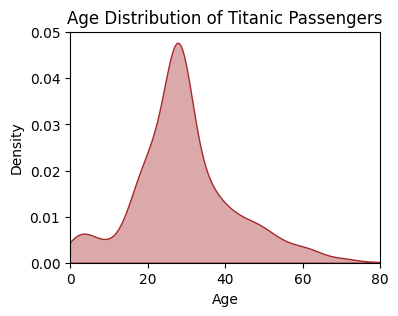

In [27]:
# KDE Plot for Age Distribution
plt.figure(figsize=(4, 3))
sns.kdeplot(titanic_clf['Age'], fill=True, color='brown', alpha=0.4)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(0, 80)  # Limit the x-axis for better visibility
plt.show()

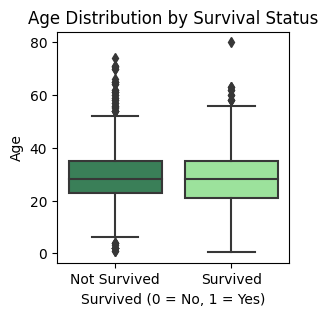

In [28]:
# Box Plot for Age vs. Survival
plt.figure(figsize=(3, 3))
sns.boxplot(data=titanic_clf, x='Survived', y='Age', palette={0: 'seagreen', 1: 'lightgreen'})
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

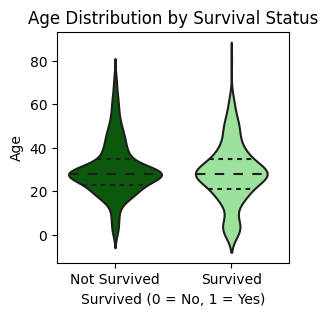

In [29]:
# Violin Plot for Age vs. Survival
plt.figure(figsize=(3, 3))
sns.violinplot(data=titanic_clf, x='Survived', y='Age', palette={0: 'darkgreen', 1: 'lightgreen'}, inner='quartile')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


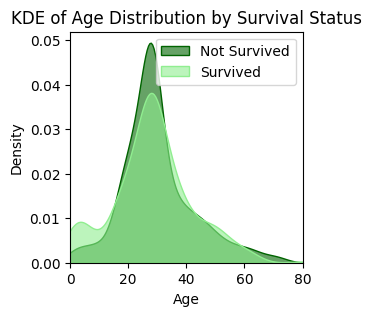

In [30]:
#KDE Plot for Age Distribution by Survival
plt.figure(figsize=(3, 3))
sns.kdeplot(data=titanic_clf[titanic_clf['Survived'] == 0]['Age'], label='Not Survived', fill=True, color='darkgreen', alpha=0.6)
sns.kdeplot(data=titanic_clf[titanic_clf['Survived'] == 1]['Age'], label='Survived', fill=True, color='lightgreen', alpha=0.6)
plt.title('KDE of Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 80)  # Limit x-axis for better visibility
plt.show()

In [31]:
# Family Size feature
titanic_clf['FamilySize'] = titanic_clf['SibSp'] + titanic_clf['Parch'] + 1  # +1 for the individual themselves

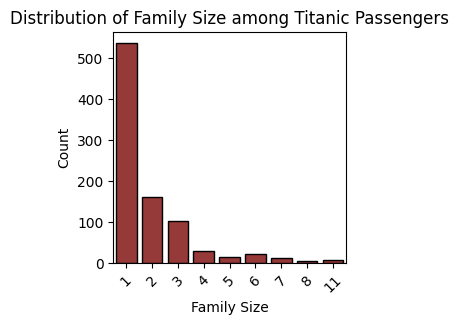

In [32]:
#count plot for Family Size distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=titanic_clf, x='FamilySize', color='brown', edgecolor='black')
plt.title('Distribution of Family Size among Titanic Passengers')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [33]:
# IsAlone feature
titanic_clf['IsAlone'] = (titanic_clf['FamilySize'] == 1).astype(int)


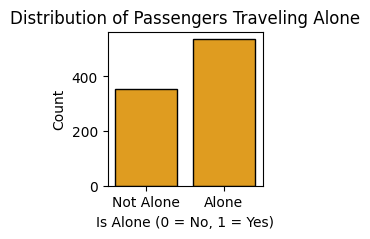

In [34]:
#  plot for IsAlone distribution
plt.figure(figsize=(2, 2))
sns.countplot(data=titanic_clf, x='IsAlone', color='orange', edgecolor='black')
plt.title('Distribution of Passengers Traveling Alone')
plt.xlabel('Is Alone (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Alone', 'Alone'])
plt.show()

In [35]:
# Age Bins
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_clf['AgeGroup'] = pd.cut(titanic_clf['Age'], bins=bins, labels=labels, right=False)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


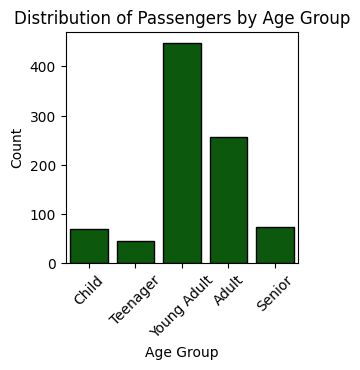

In [36]:
# Bar Plot for Age Group Distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=titanic_clf, x='AgeGroup', color='darkgreen', edgecolor='black')
plt.title('Distribution of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

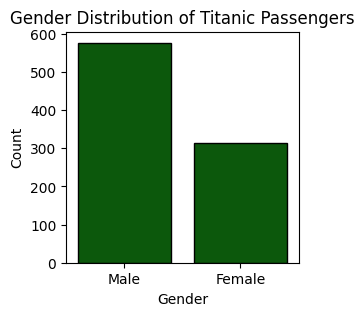

In [37]:
# Bar Plot for Sex Distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=titanic_clf, x='Sex', color='darkgreen', edgecolor='black')
plt.title('Gender Distribution of Titanic Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()